# *Salary Prediction Model for Data Science Roles*
**Objective:**

The goal of this project is to classify data science jobs into three salary categories—Low, Medium, and High—based on various job-related features. By applying machine learning techniques, we aim to uncover the patterns that drive compensation, identify key factors influencing pay, and assess how well different models can predict a job’s salary range.

**Project Overview:**

This analysis uses a dataset of over three thousand seven hundred data science job postings from multiple countries, company sizes, and work settings. The project focuses on:

- Exploring features like experience level, remote work ratio, employment type, and company size.
- Categorizing salary into:
  - Low: less than seventy-five thousand US dollars
  - Medium: between seventy-five thousand and one hundred fifty thousand US dollars
  - High: more than one hundred fifty thousand US dollars
- Training and comparing multiple classification models.
- Evaluating model performance using metrics such as Accuracy, Precision, Recall, and F1 Score.

**Project Goals:**

- Predict the salary category of a data science job using supervised classification algorithms.
- Identify which features are most impactful in determining salary.


**Key Features Analyzed:**

The following job attributes were used in model training and evaluation:

- Role-related: job title, experience level
- Work type: employment type, remote work ratio
- Company-related: size of the company
- Temporal: year of the job post (from two thousand twenty to two thousand twenty-three)
- Target: salary in US dollars (used to define the Low, Medium, and High classification)

**Models Used:**

The following classification algorithms were applied:

- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- Support Vector Classifier (SVC)



In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [3]:
#importing dataset
df = pd.read_csv('ds_salaries.csv')

In [4]:
#eda or understanding the data
df.shape

(3755, 11)

In [5]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [7]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


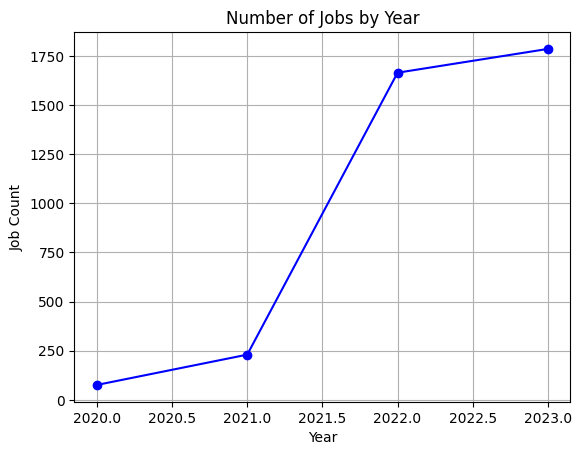

In [8]:
#data visualization
year_counts = df['work_year'].value_counts().sort_index()
year_counts.plot(kind='line', marker='o', color='blue')
plt.title('Number of Jobs by Year')
plt.xlabel('Year')
plt.ylabel('Job Count')
plt.grid(True)
plt.show()


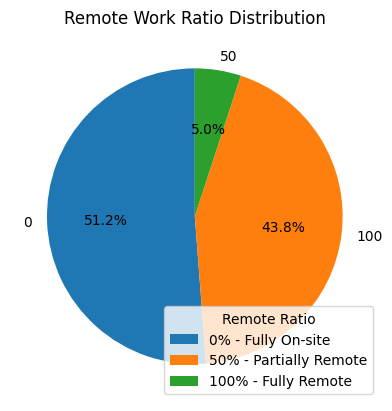

In [9]:
remote_counts = df['remote_ratio'].value_counts()
plt.pie(remote_counts, labels=remote_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Remote Work Ratio Distribution')
legend_labels = [
    "0% - Fully On-site",
    "50% - Partially Remote",
    "100% - Fully Remote"]
plt.legend(legend_labels, title="Remote Ratio", loc="best")
plt.show()
plt.show()

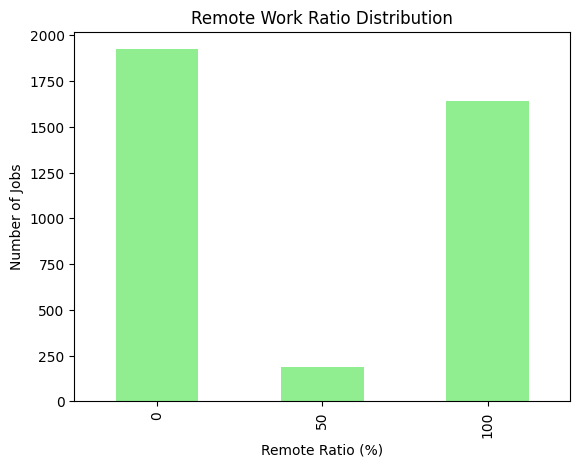

In [10]:
df['remote_ratio'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title("Remote Work Ratio Distribution")
plt.xlabel("Remote Ratio (%)")
plt.ylabel("Number of Jobs")
plt.show()


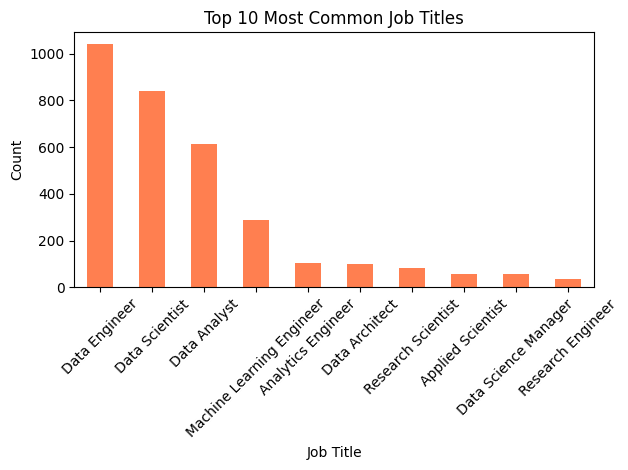

In [11]:
top_jobs = df['job_title'].value_counts().head(10)
top_jobs.plot(kind='bar', color='coral')
plt.title('Top 10 Most Common Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


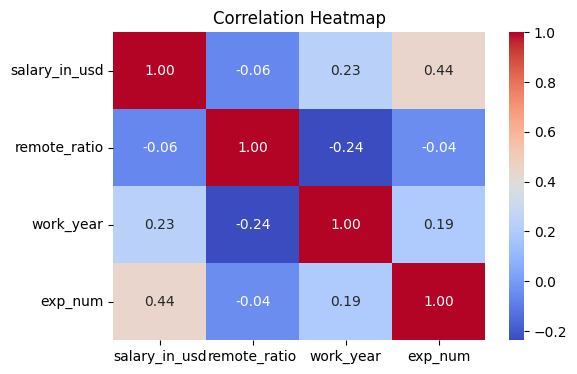

In [12]:
exp_map = {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}
df['exp_num'] = df['experience_level'].map(exp_map)


num_df = df[['salary_in_usd', 'remote_ratio', 'work_year', 'exp_num']]

# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [13]:
#pre-processing
df = pd.get_dummies(df, drop_first=True)
df['salary_class'] = pd.qcut(df['salary_in_usd'], q=3, labels=[0, 1, 2])
df = df.drop(columns=['salary_in_usd'])

In [14]:
#Features and Target
X = df.drop(columns=['salary_class'])
y = df['salary_class']

In [15]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [16]:
#model names
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Classifier": SVC(),
}

In [17]:
#model training
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    report = classification_report(y_test, predictions, output_dict=True)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, predictions),
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-score": report["weighted avg"]["f1-score"]
    })

In [18]:

# Results
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="Accuracy", ascending=False))

                       Model  Accuracy  Precision    Recall  F1-score
1              Decision Tree  0.987578   0.987654  0.987578  0.987592
2              Random Forest  0.973381   0.973789  0.973381  0.973419
3  Support Vector Classifier  0.931677   0.935884  0.931677  0.931937
0        Logistic Regression  0.708962   0.712069  0.708962  0.710129


**Conclusion:**

This project successfully demonstrated the use of machine learning models to classify data science job salaries into three distinct categories: Low, Medium, and High. By analyzing features such as experience level, remote work ratio, and employment type, we gained insights into which factors most influence compensation in the data science field. Among the models tested, classification techniques like Random Forest and Support Vector Classifier showed promising performance based on evaluation metrics. These results provide a foundation for developing practical tools to assist job seekers, recruiters, and organizations in making data-driven decisions related to salary expectations and hiring strategies.
